## Calling Google Spreadsheet and Set Format for Barchart

In [48]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
# bar-race-chart@bar-race-282506.iam.gserviceaccount.com
gc = gspread.oauth()
sh = gc.open('Provinsi')
df = pd.DataFrame(sh.worksheet('Total Kasus').get_all_values())
df = df.rename(columns = df.iloc[0].drop(df.index[0]))
df = df.iloc[1:]
df.set_index(0)
df[0] = pd.to_datetime(df[0], format='%Y/%m/%d')
df.rename(columns={0: "Total Kasus Positif"})
df = df.set_index(0)
df

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?
0,,,,,,,,,,,,,,,,,,,,,
2020-03-18,0,1,17,0,0,3,158,0,24,8,...,1,1,0,0,0,0,0,0,0,0
2020-03-19,0,1,27,0,0,5,210,0,26,12,...,1,2,0,0,0,0,0,0,0,0
2020-03-20,0,4,37,0,0,4,215,0,41,12,...,1,1,0,0,0,0,0,0,0,13
2020-03-21,0,3,43,0,0,5,267,0,55,14,...,1,1,0,0,0,0,0,0,0,10
2020-03-22,0,3,47,0,0,5,307,0,59,15,...,1,1,0,1,0,2,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,86,1527,1466,155,129,314,11637,117,3276,4006,...,191,227,875,749,242,1846,117,113,249,
2020-07-02,86,1640,1474,155,130,320,11823,117,3344,4159,...,193,228,940,762,244,1916,119,118,256,
2020-07-03,87,1706,1495,157,136,324,11961,117,3374,4293,...,193,232,950,769,249,1942,120,118,261,


## Change Object to int64

In [ ]:
df['Aceh'] = df.Aceh.apply(pd.to_numeric)

In [73]:
for i in df.columns:
    #print(i)
    df[i] = df[i].apply(pd.to_numeric)    

In [78]:
#df.info()

# Creating Bar Chart Race

In [75]:
import matplotlib.pyplot as plt
import bar_chart_race as bcr
%matplotlib inline

## Total Kasus

In [ ]:
df.drop(['?'],axis=1,inplace=True)

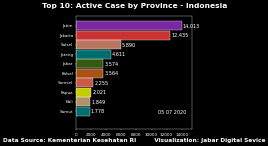

In [77]:
fig, ax = plt.subplots(figsize=(10,10), dpi=360)
#plt.style.use('dark_background')
#plt.style.use('dark_background')
plt.style.use('dark_background')
ax.set_title("Top 10: Cumulative Case by Province - Indonesia", fontsize=18, fontweight='bold',color='white', pad=20)

ax.set_xlabel('Data Source: KawalCovid19        Visualization: Jabar Digital Sevice',
                      fontweight = 'bold', fontsize = '14',color = 'white',
                      #position=(0., 1e6),
                      horizontalalignment='center')

bcr.bar_chart_race(df,
                   orientation='h',
                   #title='Top 10: Confirmed Cases By City in Jawa Barat',
                   #figsize=(14,14),
                   #dpi=240,
                   n_bars=10,
                   bar_label_size=12,
                   tick_label_size=13, 
                   fig = fig,
                   cmap = ['#FF4040', '#DEB887', '#FF7F24', '#D2691E', '#3D59AB' ,'#c72100', '#FF4040','#CDC8B1','#437016',
                           '#008B8B','#9932CC','#E9967A','#6bff5c', '#DEB887', '#D2691E', '#D2691E', '#FF7256', '#3D59AB', 
                           '#FF7256','#CDC8B1','#8B8878','#008B8B','#9932CC','#E9967A','#FF4040', '#DEB887', '#376b04', 
                           '#ff00d0', '#FF7256','#CDC8B1','#f6ff00','#008B8B','#8B8878','#5679bf'],
                   filename = 'AktifCaseProv05073.mp4',
                   period_fmt='%d %m %Y'
                   #period_label = {'x': .7, 'y': .4,'color': 'white', 'size' : 20,'weight': 'bold'}
                   )

## Active Case

In [85]:
aktifcase = pd.DataFrame(sh.worksheet('Aktif_Source_BNPB_Pivot').get_all_values())
aktifcase = aktifcase.rename(columns = aktifcase.iloc[0].drop(aktifcase.index[0]))
aktifcase = aktifcase.iloc[1:]
aktifcase.set_index(0)
aktifcase[0] = pd.to_datetime(aktifcase[0], format='%b %d, %Y')
aktifcase.rename(columns={0: "Total Kasus Aktif"})
aktifcase = aktifcase.set_index(0)
aktifcase

,Aceh,Bali,Banten,Kep Babel,Bengkulu,DI Yogyakarta,DKI Jakarta,Jambi,Jawa Barat,Jawa Tengah,...,Sulteng,Lampung,Riau,Maluku Utara,Maluku,Papua Barat,Papua,Sulbar,NTT,Gorontalo
0,,,,,,,,,,,,,,,,,,,,,
2020-03-18,0,0,16,0,0,3,135,0,23,6,...,0,1,1,0,0,0,0,0,0,0
2020-03-19,0,0,26,0,0,5,183,0,25,10,...,0,1,2,0,0,0,0,0,0,0
2020-03-20,0,3,36,0,0,4,180,0,34,9,...,0,1,1,0,0,0,0,0,0,0
2020-03-21,0,2,40,0,0,4,227,0,47,11,...,0,1,1,0,0,0,0,0,0,0
2020-03-22,0,1,43,0,0,4,256,0,45,12,...,0,1,1,0,1,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,52,652,727,19,27,42,4325,40,1477,2587,...,24,28,39,732,451,73,961,31,72,26
2020-07-02,52,749,513,17,27,43,4314,40,1502,2632,...,23,28,30,792,438,70,1030,32,63,23
2020-07-03,53,777,482,19,30,45,4209,40,1529,2716,...,22,28,22,799,436,75,1046,33,63,24


In [88]:
for i in aktifcase.columns:
    #print(i)
    aktifcase[i] = aktifcase[i].apply(pd.to_numeric)    

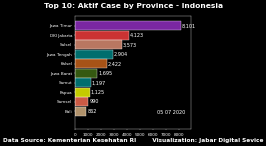

In [90]:
fig, ax = plt.subplots(figsize=(5,5), dpi=30)
#plt.style.use('dark_background')
#plt.style.use('dark_background')
plt.style.use('dark_background')
ax.set_title("Top 10: Aktif Case by Province - Indonesia", fontsize=18, fontweight='bold',color='white', pad=20)

ax.set_xlabel('Data Source: Kementerian Kesehatan RI        Visualization: Jabar Digital Sevice',
                      fontweight = 'bold', fontsize = '14',color = 'white',
                      #position=(0., 1e6),
                      horizontalalignment='center')

bcr.bar_chart_race(aktifcase,
                   orientation='h',
                   #title='Top 10: Confirmed Cases By City in Jawa Barat',
                   #figsize=(14,14),
                   #dpi=240,
                   n_bars=10,
                   bar_label_size=12,
                   tick_label_size=13, 
                   fig = fig,
                   cmap = ['#FF4040', '#DEB887', '#FF7F24', '#D2691E', '#3D59AB' ,'#c72100', '#FF4040','#CDC8B1','#437016',
                           '#008B8B','#9932CC','#E9967A','#6bff5c', '#DEB887', '#D2691E', '#D2691E', '#FF7256', '#3D59AB', 
                           '#FF7256','#CDC8B1','#8B8878','#008B8B','#9932CC','#E9967A','#FF4040', '#DEB887', '#376b04', 
                           '#ff00d0', '#FF7256','#CDC8B1','#f6ff00','#008B8B','#8B8878','#5679bf'],
                   filename = 'AktifCaseProv05073.mp4',
                   period_fmt='%d %m %Y'
                   #period_label = {'x': .7, 'y': .4,'color': 'white', 'size' : 20,'weight': 'bold'}
                   )

## Meninggal

In [95]:
meninggal = pd.DataFrame(sh.worksheet('ProvMeninggal_Pivot').get_all_values())
#meninggal
meninggal = meninggal.rename(columns = meninggal.iloc[0].drop(meninggal.index[0]))
meninggal = aktifcase.iloc[1:]
#meninggal.set_index(0)
#meninggal[0] = pd.to_datetime(meninggal[0], format='%b %d, %Y')
#meninggal.rename(columns={0: "Total Kasus Aktif"})
#meninggal = meninggal.set_index(0)
meninggal

,Aceh,Bali,Banten,Kep Babel,Bengkulu,DI Yogyakarta,DKI Jakarta,Jambi,Jawa Barat,Jawa Tengah,...,Sulteng,Lampung,Riau,Maluku Utara,Maluku,Papua Barat,Papua,Sulbar,NTT,Gorontalo
0,,,,,,,,,,,,,,,,,,,,,
2020-03-19,0,0,26,0,0,5,183,0,25,10,...,0,1,2,0,0,0,0,0,0,0
2020-03-20,0,3,36,0,0,4,180,0,34,9,...,0,1,1,0,0,0,0,0,0,0
2020-03-21,0,2,40,0,0,4,227,0,47,11,...,0,1,1,0,0,0,0,0,0,0
2020-03-22,0,1,43,0,0,4,256,0,45,12,...,0,1,1,0,1,0,2,0,0,0
2020-03-23,0,4,52,0,0,4,301,1,45,12,...,0,1,1,1,1,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,52,652,727,19,27,42,4325,40,1477,2587,...,24,28,39,732,451,73,961,31,72,26
2020-07-02,52,749,513,17,27,43,4314,40,1502,2632,...,23,28,30,792,438,70,1030,32,63,23
2020-07-03,53,777,482,19,30,45,4209,40,1529,2716,...,22,28,22,799,436,75,1046,33,63,24


In [96]:
for i in meninggal.columns:
    #print(i)
    meninggal[i] = meninggal[i].apply(pd.to_numeric)    

C:\Users\Christopher Aryo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


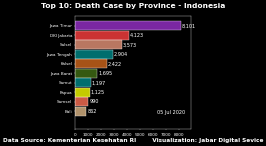

In [99]:
fig, ax = plt.subplots(figsize=(5,5), dpi=30)
#plt.style.use('dark_background')
#plt.style.use('dark_background')
plt.style.use('dark_background')
ax.set_title("Top 10: Death Case by Province - Indonesia", fontsize=18, fontweight='bold',color='white', pad=20)

ax.set_xlabel('Data Source: Kementerian Kesehatan RI        Visualization: Jabar Digital Sevice',
                      fontweight = 'bold', fontsize = '14',color = 'white',
                      #position=(0., 1e6),
                      horizontalalignment='center')

bcr.bar_chart_race(meninggal,
                   orientation='h',
                   #title='Top 10: Confirmed Cases By City in Jawa Barat',
                   #figsize=(14,14),
                   #dpi=240,
                   n_bars=10,
                   bar_label_size=12,
                   tick_label_size=13, 
                   fig = fig,
                   cmap = ['#FF4040', '#DEB887', '#FF7F24', '#D2691E', '#3D59AB' ,'#c72100', '#FF4040','#CDC8B1','#437016',
                           '#008B8B','#9932CC','#E9967A','#6bff5c', '#DEB887', '#D2691E', '#D2691E', '#FF7256', '#3D59AB', 
                           '#FF7256','#CDC8B1','#8B8878','#008B8B','#9932CC','#E9967A','#FF4040', '#DEB887', '#376b04', 
                           '#ff00d0', '#FF7256','#CDC8B1','#f6ff00','#008B8B','#8B8878','#5679bf'],
                   #filename = 'AktifCaseProv05073.mp4',
                   period_fmt='%d %b %Y'
                   #period_label = {'x': .7, 'y': .4,'color': 'white', 'size' : 20,'weight': 'bold'}
                   )

## Total Kabkot

In [100]:
totalkabkot = pd.DataFrame(sh.worksheet('Total Kabkot Pivot').get_all_values())
totalkabkot = totalkabkot.rename(columns = totalkabkot.iloc[0].drop(totalkabkot.index[0]))
totalkabkot = totalkabkot.iloc[1:]
totalkabkot.set_index(0)
totalkabkot[0] = pd.to_datetime(totalkabkot[0], format='%b %d, %Y')
totalkabkot.rename(columns={0: "Total Kasus Kabkot"})
totalkabkot = totalkabkot.set_index(0)
totalkabkot

,Kabupaten Bandung,Kabupaten Bandung Barat,Kabupaten Bekasi,Kabupaten Bogor,Kabupaten Ciamis,Kabupaten Cianjur,Kabupaten Cirebon,Kabupaten Garut,Kabupaten Indramayu,Kabupaten Karawang,...,Kabupaten Tasikmalaya,Kota Bandung,Kota Banjar,Kota Bekasi,Kota Bogor,Kota Cimahi,Kota Cirebon,Kota Depok,Kota Sukabumi,Kota Tasikmalaya
0,,,,,,,,,,,,,,,,,,,,,
2020-03-06,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,0
2020-03-07,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,0
2020-03-08,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,0
2020-03-09,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,0
2020-03-10,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-28,106,76,222,274,13,21,19,26,22,34,...,4,370,8,543,146,98,15,719,49,26
2020-06-29,106,77,223,278,13,22,19,26,22,35,...,4,370,8,549,145,102,15,724,68,26
2020-06-30,106,77,224,277,13,22,19,26,22,36,...,4,372,8,557,145,102,15,783,69,24


In [101]:
for i in totalkabkot.columns:
    #print(i)
    totalkabkot[i] = totalkabkot[i].apply(pd.to_numeric)    

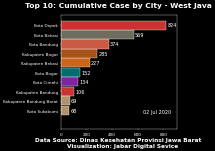

In [102]:
fig, ax = plt.subplots(figsize=(5,5), dpi=30)
#plt.style.use('dark_background')
#plt.style.use('dark_background')
plt.style.use('dark_background')
ax.set_title("Top 10: Cumulative Case by City - West Java", fontsize=18, fontweight='bold',color='white', pad=20)

ax.set_xlabel('Data Source: Dinas Kesehatan Provinsi Jawa Barat \n    Visualization: Jabar Digital Sevice',
                      fontweight = 'bold', fontsize = '14',color = 'white',
                      #position=(0., 1e6),
                      horizontalalignment='center')

bcr.bar_chart_race(totalkabkot,
                   orientation='h',
                   #title='Top 10: Confirmed Cases By City in Jawa Barat',
                   #figsize=(14,14),
                   #dpi=240,
                   n_bars=10,
                   bar_label_size=12,
                   tick_label_size=13, 
                   fig = fig,
                   cmap = ['#FF4040', '#DEB887', '#FF7F24', '#D2691E', '#3D59AB' ,'#c72100', '#FF4040','#CDC8B1','#437016',
                           '#008B8B','#9932CC','#E9967A','#6bff5c', '#DEB887', '#D2691E', '#D2691E', '#FF7256', '#3D59AB', 
                           '#FF7256','#CDC8B1','#8B8878','#008B8B','#9932CC','#E9967A','#FF4040', '#DEB887', '#376b04', 
                           '#ff00d0', '#FF7256','#CDC8B1','#f6ff00','#008B8B','#8B8878','#5679bf'],
                   #filename = 'AktifCaseProv05073.mp4',
                   period_fmt='%d %b %Y'
                   #period_label = {'x': .7, 'y': .4,'color': 'white', 'size' : 20,'weight': 'bold'}
                   )

## Aktif Kabkot

In [103]:
aktifkabkot = pd.DataFrame(sh.worksheet('Aktif Kabkot Pivot').get_all_values())
aktifkabkot = aktifkabkot.rename(columns = aktifkabkot.iloc[0].drop(aktifkabkot.index[0]))
aktifkabkot = aktifkabkot.iloc[1:]
aktifkabkot.set_index(0)
aktifkabkot[0] = pd.to_datetime(aktifkabkot[0], format='%b %d, %Y')
aktifkabkot.rename(columns={0: "Total Aktif Kabkot"})
aktifkabkot = aktifkabkot.set_index(0)
aktifkabkot

,Kabupaten Bandung,Kabupaten Bandung Barat,Kabupaten Bekasi,Kabupaten Bogor,Kabupaten Ciamis,Kabupaten Cianjur,Kabupaten Cirebon,Kabupaten Garut,Kabupaten Indramayu,Kabupaten Karawang,...,Kabupaten Tasikmalaya,Kota Bandung,Kota Banjar,Kota Bekasi,Kota Bogor,Kota Cimahi,Kota Cirebon,Kota Depok,Kota Sukabumi,Kota Tasikmalaya
0,,,,,,,,,,,,,,,,,,,,,
2020-03-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2020-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
2020-03-19,0,0,0,1,0,0,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0
2020-03-22,0,0,0,1,0,0,0,0,0,0,...,0,0,0,3,1,0,0,0,0,0
2020-03-26,0,0,0,1,0,0,0,0,0,0,...,0,0,0,4,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-28,28,24,28,215,5,18,10,8,11,14,...,1,100,1,296,51,34,8,323,14,10
2020-06-29,28,25,29,219,5,19,10,8,11,15,...,1,98,1,302,50,38,8,328,33,10
2020-06-30,28,25,10,218,5,19,10,8,11,16,...,1,100,1,310,50,38,8,329,34,0


In [105]:
for i in aktifkabkot.columns:
    #print(i)
    aktifkabkot[i] = aktifkabkot[i].apply(pd.to_numeric)    

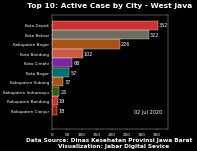

In [106]:
fig, ax = plt.subplots(figsize=(5,5), dpi=30)
#plt.style.use('dark_background')
#plt.style.use('dark_background')
plt.style.use('dark_background')
ax.set_title("Top 10: Active Case by City - West Java", fontsize=18, fontweight='bold',color='white', pad=20)

ax.set_xlabel('Data Source: Dinas Kesehatan Provinsi Jawa Barat \n    Visualization: Jabar Digital Sevice',
                      fontweight = 'bold', fontsize = '14',color = 'white',
                      #position=(0., 1e6),
                      horizontalalignment='center')

bcr.bar_chart_race(aktifkabkot,
                   orientation='h',
                   #title='Top 10: Confirmed Cases By City in Jawa Barat',
                   #figsize=(14,14),
                   #dpi=240,
                   n_bars=10,
                   bar_label_size=12,
                   tick_label_size=13, 
                   fig = fig,
                   cmap = ['#FF4040', '#DEB887', '#FF7F24', '#D2691E', '#3D59AB' ,'#c72100', '#FF4040','#CDC8B1','#437016',
                           '#008B8B','#9932CC','#E9967A','#6bff5c', '#DEB887', '#D2691E', '#D2691E', '#FF7256', '#3D59AB', 
                           '#FF7256','#CDC8B1','#8B8878','#008B8B','#9932CC','#E9967A','#FF4040', '#DEB887', '#376b04', 
                           '#ff00d0', '#FF7256','#CDC8B1','#f6ff00','#008B8B','#8B8878','#5679bf'],
                   #filename = 'AktifCaseProv05073.mp4',
                   period_fmt='%d %b %Y'
                   #period_label = {'x': .7, 'y': .4,'color': 'white', 'size' : 20,'weight': 'bold'}
                   )